### 1. Data Preparation:


In [277]:
# Multivariate Linear Regression

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
df = data

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Visualization

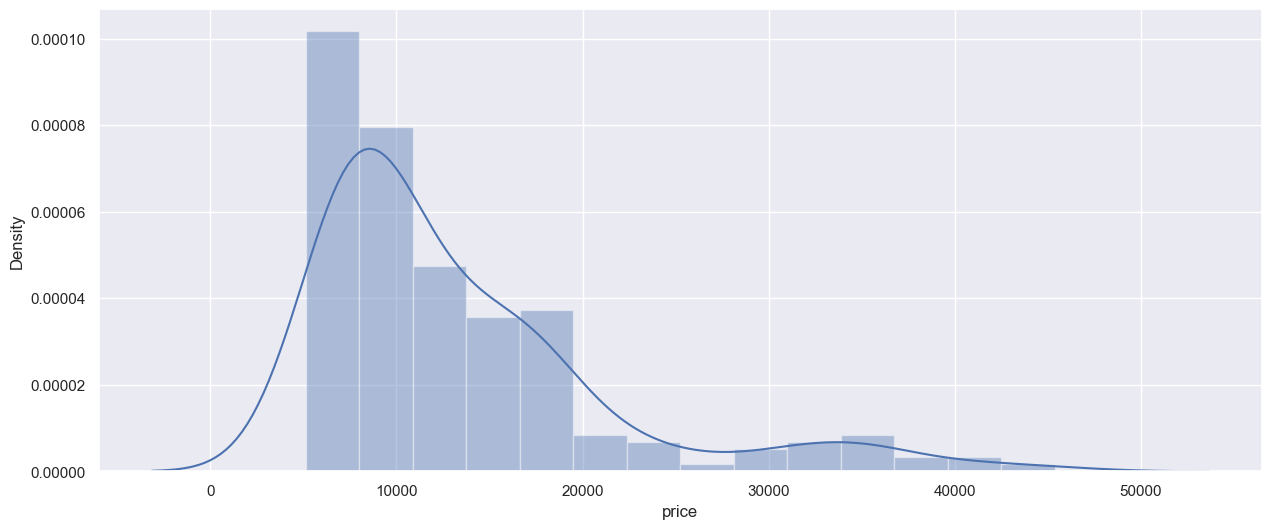

In [4]:
plt.subplots(figsize=(15,6))
sns.distplot(df['price']);

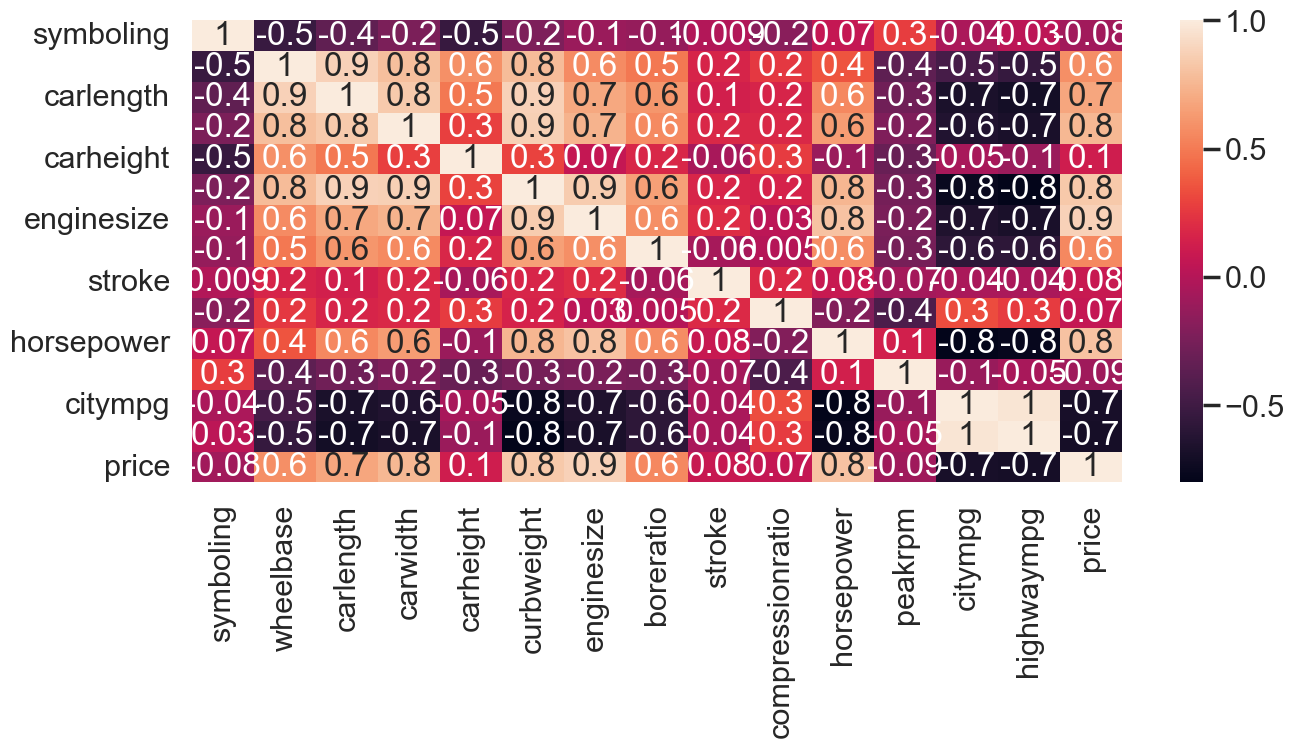

In [5]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = df.drop( ['car_ID','enginelocation'], axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

### 2. Data Preprocessing:


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
# checking Missing unspelled , erroneous Data 

for column in df.columns:
    print(column + ' : ' + str(len(df[column].unique())))
    if(len(df[column].unique()) < 100):
        print(column + ' : ' + str(df[column].unique()))
    print('\n')

car_ID : 205


symboling : 6
symboling : [ 3  1  2  0 -1 -2]


CarName : 147


fueltype : 2
fueltype : ['gas' 'diesel']


aspiration : 2
aspiration : ['std' 'turbo']


doornumber : 2
doornumber : ['two' 'four']


carbody : 5
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel : 3
drivewheel : ['rwd' 'fwd' '4wd']


enginelocation : 2
enginelocation : ['front' 'rear']


wheelbase : 53
wheelbase : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]


carlength : 75
carlength : [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.

In [11]:
# Replacing misspelled values 


### Converting Categorical values into Numerical

In [12]:
print('fueltype = ', df['fueltype'].unique())
print('doornumber = ', df['doornumber'].unique())
print('carbody = ', df['carbody'].unique())
print('cylindernumber = ', df['cylindernumber'].unique())
print('aspiration = ',df['aspiration'].unique())
print('enginelocation = ', df['enginelocation'].unique())

fueltype =  ['gas' 'diesel']
doornumber =  ['two' 'four']
carbody =  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
cylindernumber =  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
aspiration =  ['std' 'turbo']
enginelocation =  ['front' 'rear']


In [13]:
df.replace({'fueltype':{'gas':0, 'diesel':1}}, inplace=True)
df.replace({'doornumber':{'two':2, 'four':4}}, inplace= True)
df.replace({'aspiration':{'std':0,'turbo':1}}, inplace = True)
df.replace({'enginelocation':{'front':0, 'rear':1}}, inplace = True)
df.replace({'carbody':{'convertible':1, 'hatchback':2, 'sedan':3,'wagon':4, 'hardtop':5}}, inplace=True)
df.replace({'cylindernumber':{'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}}, inplace =True)


In [14]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,1,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,1,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,2,rwd,0,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,3,fwd,0,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,3,4wd,0,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
df.shape

(205, 26)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [20]:
#df['CarName'].split(' ')

carnames = df['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [21]:
import re

pattern = re.compile(r'\w+-?\w+')
carnames = df['CarName'].apply(lambda x: re.findall(pattern , x)[0])
carnames.head(30)


#"r" in the beginning is making sure that the string is being treated as a "raw string"
# "\W" Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [22]:
df['car_company'] = df['CarName'].apply(lambda x: re.findall(pattern , x)[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,0,0,2,1,rwd,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,0,0,2,1,rwd,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,0,0,2,2,rwd,0,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,0,0,4,3,fwd,0,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,0,0,4,3,4wd,0,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
# df['Company'] = df['CarName'].astype('category').value_counts()
# df['Company'].isnull().sum()
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [24]:
# some car-company names are misspelled - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

# This is a data quality issue, let's solve it.

In [25]:
# correcting the company Names (Erroneous Data)

df.loc[(df['car_company']=='vw') | (df['car_company']=='vokswagen') , 'car_company']='volkswagen'
       
df.loc[df['car_company'] =='toyouta', 'car_company']= 'toyota'

df.loc[df['car_company'] == "porcshce", 'car_company'] = 'porsche'

df.loc[df['car_company']=='maxda' , 'car_company']= 'mazda'

df.loc[(df['car_company']=='saab') | (df['car_company']=='subaru') , 'car_company']='sabro'
       
df.loc[df['car_company']=='Nissan' , 'car_company' ] = 'nissan'


In [26]:
df['car_company'].value_counts()

toyota         32
sabro          18
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

In [27]:
# Drop carname 
df= df.drop('CarName' , axis =1 )

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### 3. Handling Categorical Features:
- Identify the categorical features in the dataset. These are the features that represent non-numeric data, such as car make, model, or fuel type.
- `Hint`: You can use the `pd.get_dummies()` function from pandas to perform one-hot encoding on the categorical features. This function will create binary vectors for each category within a categorical feature.

In [29]:
num_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])

num_data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,2,1,0,88.6,168.8,64.1,...,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,2,1,0,88.6,168.8,64.1,...,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,2,2,0,94.5,171.2,65.5,...,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,0,0,4,3,0,99.8,176.6,66.2,...,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0,0,4,3,0,99.4,176.6,66.4,...,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
#df5= num_data.drop(['car_ID', 'symboling', 'aspiration', 'enginelocation','cylindernumber','peakrpm' ], axis=1 )

#plt.figure(figsize=(15,18))
#sns.pairplot(df5);
#plt.show()

In [31]:
num_data.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(num_data)
num_scaled = pd.DataFrame(x_scaled_minmax, columns = num_data.columns)
num_scaled.head()


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.0,0.0,0.0,0.00,0.0,0.058309,0.413433,0.316667,...,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.0,0.0,0.0,0.00,0.0,0.058309,0.413433,0.316667,...,0.2,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.0,0.0,0.0,0.25,0.0,0.230321,0.449254,0.433333,...,0.4,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.0,0.0,1.0,0.50,0.0,0.384840,0.529851,0.491667,...,0.2,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.0,0.0,1.0,0.50,0.0,0.373178,0.529851,0.508333,...,0.3,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [33]:
cat_data.columns

Index(['drivewheel', 'enginetype', 'fuelsystem', 'car_company'], dtype='object')

In [34]:
cat_data.head()

,drivewheel,enginetype,fuelsystem,car_company
0,rwd,dohc,mpfi,alfa-romero
1,rwd,dohc,mpfi,alfa-romero
2,rwd,ohcv,mpfi,alfa-romero
3,fwd,ohc,mpfi,audi
4,4wd,ohc,mpfi,audi


### Label Encoding of cat_data

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for cat_cols in cat_data:
    if df[cat_cols].dtype =='object':
        df[cat_cols] = label_encoder.fit_transform(df[cat_cols])
    print(  df[cat_cols] )

0      2
1      2
2      2
3      1
4      0
      ..
200    2
201    2
202    2
203    2
204    2
Name: drivewheel, Length: 205, dtype: int32
0      0
1      0
2      5
3      3
4      3
      ..
200    3
201    3
202    5
203    3
204    3
Name: enginetype, Length: 205, dtype: int32
0      5
1      5
2      5
3      5
4      5
      ..
200    5
201    5
202    5
203    3
204    5
Name: fuelsystem, Length: 205, dtype: int32
0       0
1       0
2       0
3       1
4       1
       ..
200    20
201    20
202    20
203    20
204    20
Name: car_company, Length: 205, dtype: int32


In [36]:
print(df[cat_cols].head(30))

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    4
19    4
20    4
21    5
22    5
23    5
24    5
25    5
26    5
27    5
28    5
29    5
Name: car_company, dtype: int32


### One-hot encoding 

In [37]:
df_OneHot=pd.get_dummies(df,columns=['drivewheel', 'enginetype', 'fuelsystem', 'car_company'])
df_OneHot.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,car_company_11,car_company_12,car_company_13,car_company_14,car_company_15,car_company_16,car_company_17,car_company_18,car_company_19,car_company_20
0,1,3,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,0,2,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,2,2,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,4,3,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,4,3,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Checking duplicate columns 

len(df_OneHot.columns) == len(set(df_OneHot.columns))

True

#### 4. Concatenate Transformed Data:
- After one-hot encoding the categorical features, you will have additional binary columns in the DataFrame.
- Hint: Use the `pd.concat()` function to concatenate the transformed data with the original DataFrame.


In [39]:
df1 = pd.concat([num_scaled, df_OneHot], axis=1)
df1.head()

#X = pd.concat([X, cars_dummies], axis=1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,...,car_company_11,car_company_12,car_company_13,car_company_14,car_company_15,car_company_16,car_company_17,car_company_18,car_company_19,car_company_20
0,0.000000,1.0,0.0,0.0,0.0,0.00,0.0,0.058309,0.413433,0.316667,...,0,0,0,0,0,0,0,0,0,0
1,0.004902,1.0,0.0,0.0,0.0,0.00,0.0,0.058309,0.413433,0.316667,...,0,0,0,0,0,0,0,0,0,0
2,0.009804,0.6,0.0,0.0,0.0,0.25,0.0,0.230321,0.449254,0.433333,...,0,0,0,0,0,0,0,0,0,0
3,0.014706,0.8,0.0,0.0,1.0,0.50,0.0,0.384840,0.529851,0.491667,...,0,0,0,0,0,0,0,0,0,0
4,0.019608,0.8,0.0,0.0,1.0,0.50,0.0,0.373178,0.529851,0.508333,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df1.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'drivewheel_0', 'drivewheel_1',
       'drivewheel_2', 'enginetype_0', 'enginetype_1', 'enginetype_2',
       'enginetype_3', 'enginetype_4', 'enginetype_5', 'enginetype_6',
       'fuelsystem_0', 'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3',
       'fuelsystem_4', 'fuelsystem_5', 'fuelsystem_6', 'fuelsystem_7',
       'car_company_0', 'car_company_1'

In [41]:
#df2= df1.T.drop_duplicates().T

df2 = df1.loc[:,~df1.columns.duplicated()].copy()

In [42]:
df2.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'drivewheel_0', 'drivewheel_1', 'drivewheel_2',
       'enginetype_0', 'enginetype_1', 'enginetype_2', 'enginetype_3',
       'enginetype_4', 'enginetype_5', 'enginetype_6', 'fuelsystem_0',
       'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3', 'fuelsystem_4',
       'fuelsystem_5', 'fuelsystem_6', 'fuelsystem_7', 'car_company_0',
       'car_company_1', 'car_company_2', 'car_company_3', 'car_company_4',
       'car_company_5', 'car_company_6', 'car_company_7', 'car_company_8',
       'car_company_9', 'car_company_10', 'car_company_11', 'car_company_12',
       'car_company_13', 'car_company_14', 'car_company_15', 'car_company_16',
       'car_company_17', 'car_comp

In [43]:
df2.isnull().sum()

car_ID            0
symboling         0
fueltype          0
aspiration        0
doornumber        0
                 ..
car_company_16    0
car_company_17    0
car_company_18    0
car_company_19    0
car_company_20    0
Length: 61, dtype: int64

In [44]:
## Normalization
df2.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'drivewheel_0', 'drivewheel_1', 'drivewheel_2',
       'enginetype_0', 'enginetype_1', 'enginetype_2', 'enginetype_3',
       'enginetype_4', 'enginetype_5', 'enginetype_6', 'fuelsystem_0',
       'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3', 'fuelsystem_4',
       'fuelsystem_5', 'fuelsystem_6', 'fuelsystem_7', 'car_company_0',
       'car_company_1', 'car_company_2', 'car_company_3', 'car_company_4',
       'car_company_5', 'car_company_6', 'car_company_7', 'car_company_8',
       'car_company_9', 'car_company_10', 'car_company_11', 'car_company_12',
       'car_company_13', 'car_company_14', 'car_company_15', 'car_company_16',
       'car_company_17', 'car_comp

<Axes: >

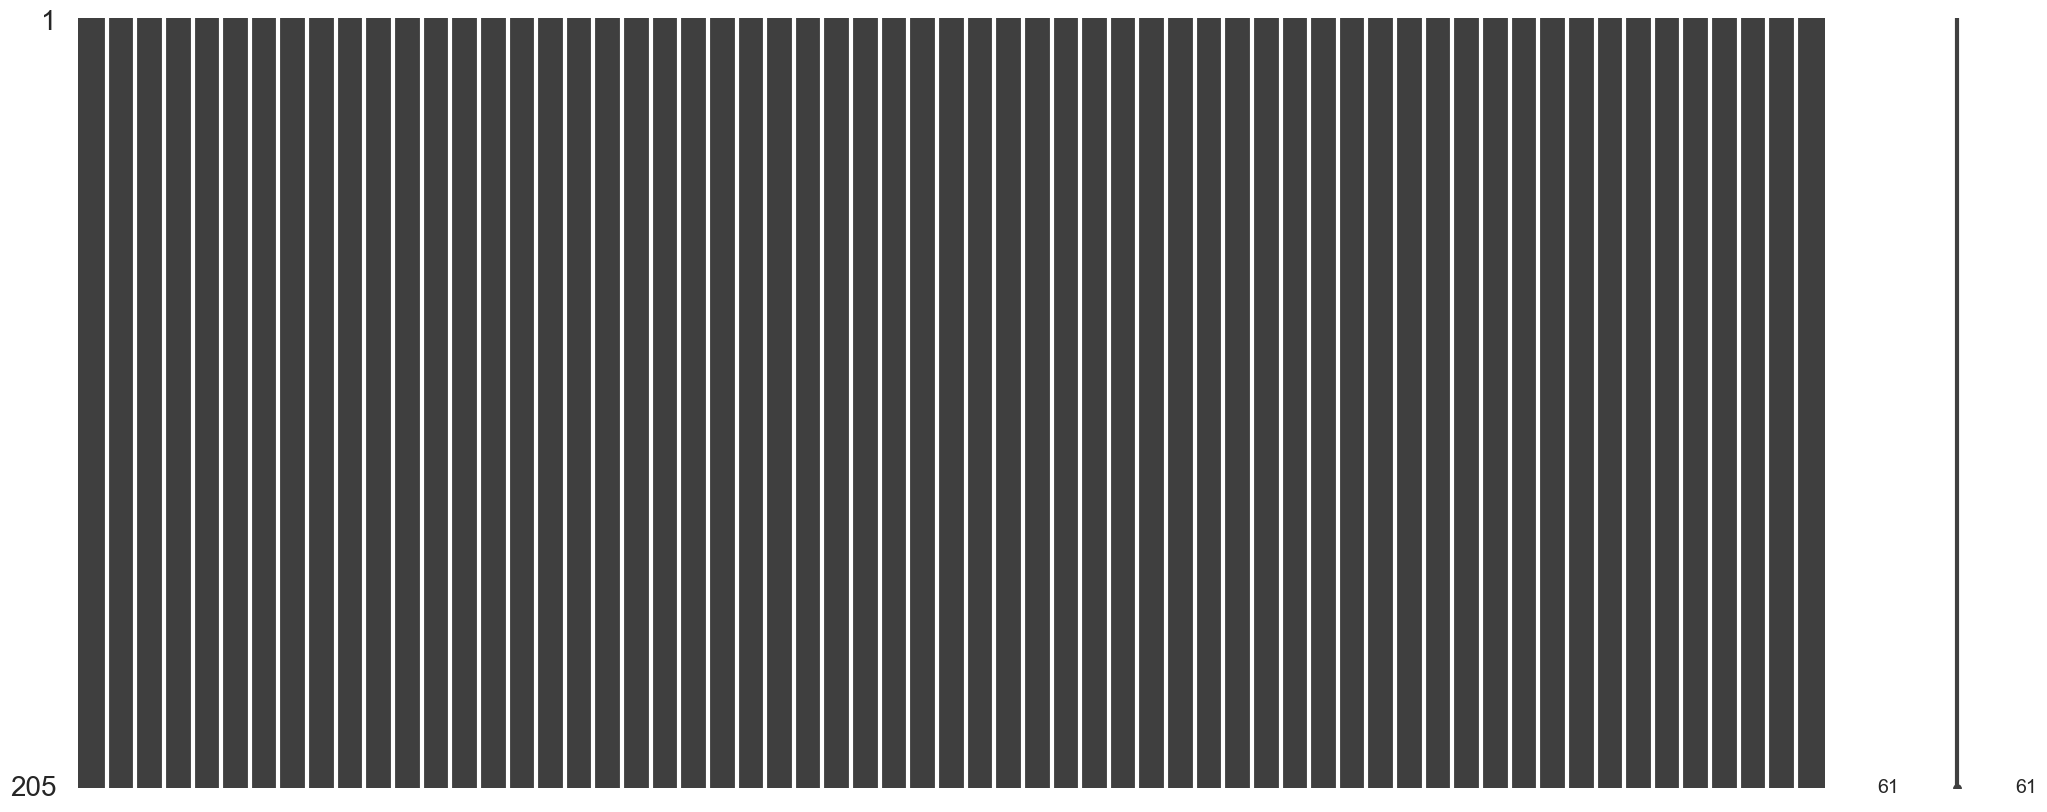

In [45]:
# Visualizing Missing Values 
import missingno as msno
msno.matrix(df2)

In [46]:
# Separating the dependant variable from independant variables 

X = df2.drop(['price'], axis = 1)
X = df2.drop(['car_ID', 'symboling', 'enginelocation','stroke', 'compressionratio'] , axis=1)

Y = df2[['price']]
print(X.shape)
print(Y.shape)
print(Y)

(205, 56)
(205, 1)
        price
0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
..        ...
200  0.291123
201  0.345738
202  0.406311
203  0.430763
204  0.434611

[205 rows x 1 columns]


In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns = X.columns)
X.head()


,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,car_company_11,car_company_12,car_company_13,car_company_14,car_company_15,car_company_16,car_company_17,car_company_18,car_company_19,car_company_20
0,0.0,0.0,0.0,0.00,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00,0.058309,0.413433,0.316667,0.083333,0.411171,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.25,0.230321,0.449254,0.433333,0.383333,0.517843,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.50,0.384840,0.529851,0.491667,0.541667,0.329325,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.50,0.373178,0.529851,0.508333,0.541667,0.518231,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 5. Data Splitting:
- Split the dataset into training and testing sets using an 80-20 or 70-30 ratio.

In [48]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X , Y , test_size = 0.30 , random_state = 25 , shuffle = True)
print('Shape of Xtrain = ', xtrain.shape , '  Shape of Ytrain = ', ytrain.shape)
print('Shape of Xtest  =  ' , xtest.shape ,  '   Shape of Ytest  = ', ytest.shape)

Shape of Xtrain =  (143, 56)   Shape of Ytrain =  (143, 1)
Shape of Xtest  =   (62, 56)    Shape of Ytest  =  (62, 1)


### 6. Model Building:
- Create an instance of the linear regression model from scikit-learn.
- Train the model using the training data.

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
model.fit(xtrain , ytrain)
pred = model.predict(xtest)

In [51]:
x_c = xtest.copy()
x_c['Predicted_Value'] = pred

#x_c['predicted_value']=pred

In [52]:
# Adding new columns predicted values and original values and comparing their values 
x_c['Original_Vlaues']= ytest

x_c

,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,car_company_13,car_company_14,car_company_15,car_company_16,car_company_17,car_company_18,car_company_19,car_company_20,Predicted_Value,Original_Vlaues
26,0.0,0.0,1.0,0.50,0.206997,0.241791,0.291667,0.233333,0.194337,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061839,0.061839
122,0.0,0.0,1.0,0.50,0.206997,0.391045,0.291667,0.250000,0.272692,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061839,0.061839
190,0.0,0.0,0.0,0.25,0.230321,0.367164,0.308333,0.300000,0.284329,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.120699,0.120699
43,0.0,0.0,1.0,0.50,0.224490,0.441791,0.125000,0.475000,0.329325,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041383,0.041383
69,1.0,1.0,0.0,1.00,0.586006,0.692537,0.833333,0.591667,0.778510,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.572414,0.572414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.0,0.0,1.0,0.50,1.000000,1.000000,0.950000,0.741667,0.935609,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889777,0.889777
32,0.0,0.0,0.0,0.25,0.206997,0.132836,0.308333,0.400000,0.135376,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006976,0.006976
171,0.0,0.0,0.0,0.25,0.344023,0.523881,0.441667,0.350000,0.475562,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.159649,0.159649
153,0.0,0.0,1.0,0.75,0.265306,0.426866,0.275000,0.941667,0.307215,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.044685,0.044685


### 7. Model Evaluation:

- Make predictions on the testing data using the trained model.
- Evaluate the model's performance using appropriate metrics (e.g., Mean Absolute Error (MAE), Mean Squared Error (MSE), and R squared score).
- Interpret the results and discuss the model's performance.


#### R2 Score

In [53]:
from sklearn.metrics import r2_score
test_r2 = r2_score(ytest , pred)

In [54]:
X.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'drivewheel_0', 'drivewheel_1', 'drivewheel_2',
       'enginetype_0', 'enginetype_1', 'enginetype_2', 'enginetype_3',
       'enginetype_4', 'enginetype_5', 'enginetype_6', 'fuelsystem_0',
       'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3', 'fuelsystem_4',
       'fuelsystem_5', 'fuelsystem_6', 'fuelsystem_7', 'car_company_0',
       'car_company_1', 'car_company_2', 'car_company_3', 'car_company_4',
       'car_company_5', 'car_company_6', 'car_company_7', 'car_company_8',
       'car_company_9', 'car_company_10', 'car_company_11', 'car_company_12',
       'car_company_13', 'car_company_14', 'car_company_15', 'car_company_16',
       'car_company_17', 'car_company_18', 'car_company_19', 'car_company_20'],
      dtype='object')

In [55]:
#train_r2 = r2_score(ytrain, model.predict(xtest))
train_r2=r2_score(ytrain,model.predict(xtrain))

In [56]:
print('R2 score for testing : ' , test_r2)
print('R2 score for training : ', train_r2)

R2 score for testing :  0.9999984289209867
R2 score for training :  1.0


In [57]:
import adj_helper as helper
helper.adjR2(xtest ,ytest , test_r2)

The adjusted R2 is: 0.9999808328360373


## Aditional Steps Verification Process

In [58]:
range(1 , (xtest.shape[-1]) +1)

range(1, 57)

In [59]:
r_2 =[]
for i in range(1 , (xtest.shape[-1]) +1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i], ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest , pred))

In [60]:
r_2

[0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289209867,
 0.9999984289

Text(0, 0.5, 'r_2 score')

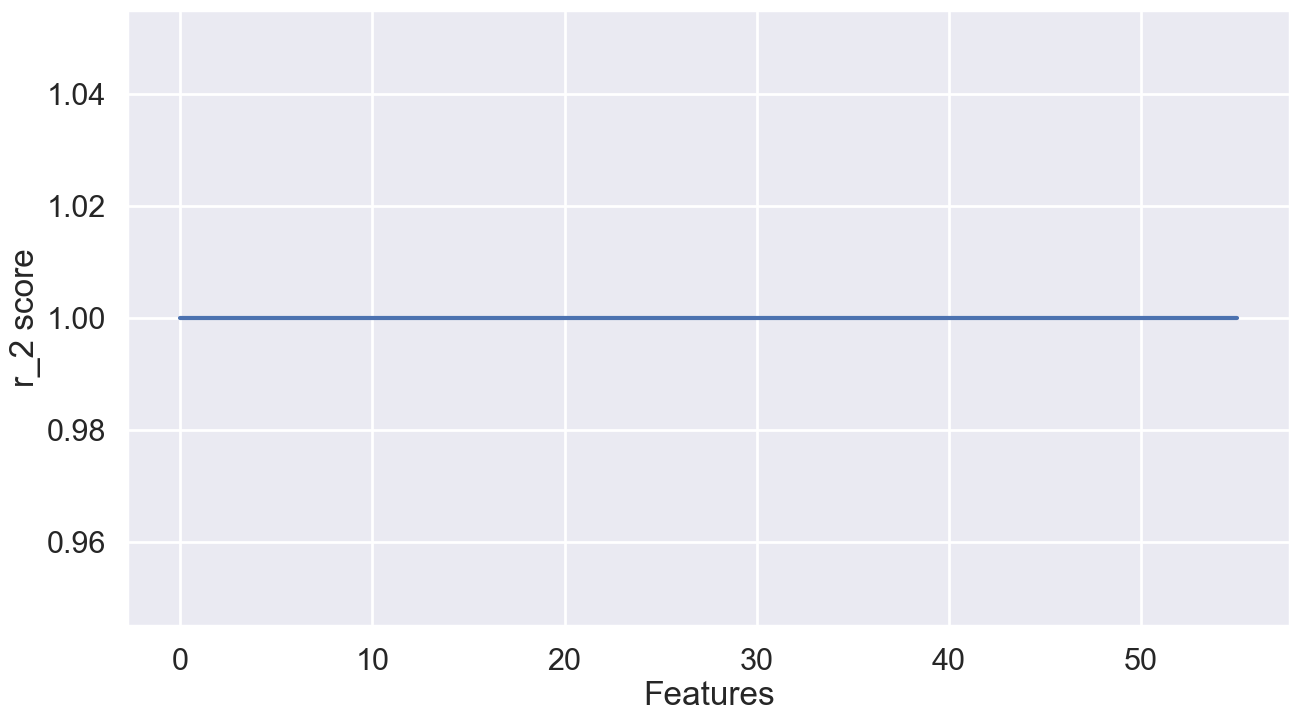

In [61]:
plt.figure(figsize=(15,8))
plt.plot(r_2)
plt.xlabel('Features')
plt.ylabel('r_2 score')

In [62]:
from sklearn.metrics import mean_squared_error , mean_absolute_error 

print( 'Mean Squared Error ' , mean_squared_error(pred,  ytest) )
print('Mean Absolute Error  ' , mean_absolute_error(pred , ytest) ) 

Mean Squared Error  6.738628505579004e-08
Mean Absolute Error   5.855695538348904e-05


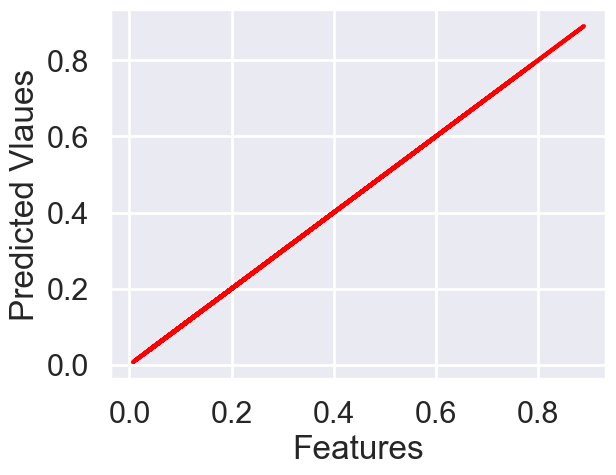

In [63]:

plt.plot(pred, ytest ,  color='red', label='Linear Regression Line')

plt.xlabel('Features')
plt.ylabel('Predicted Vlaues')
plt.show()

## Recursive Feature Elimination

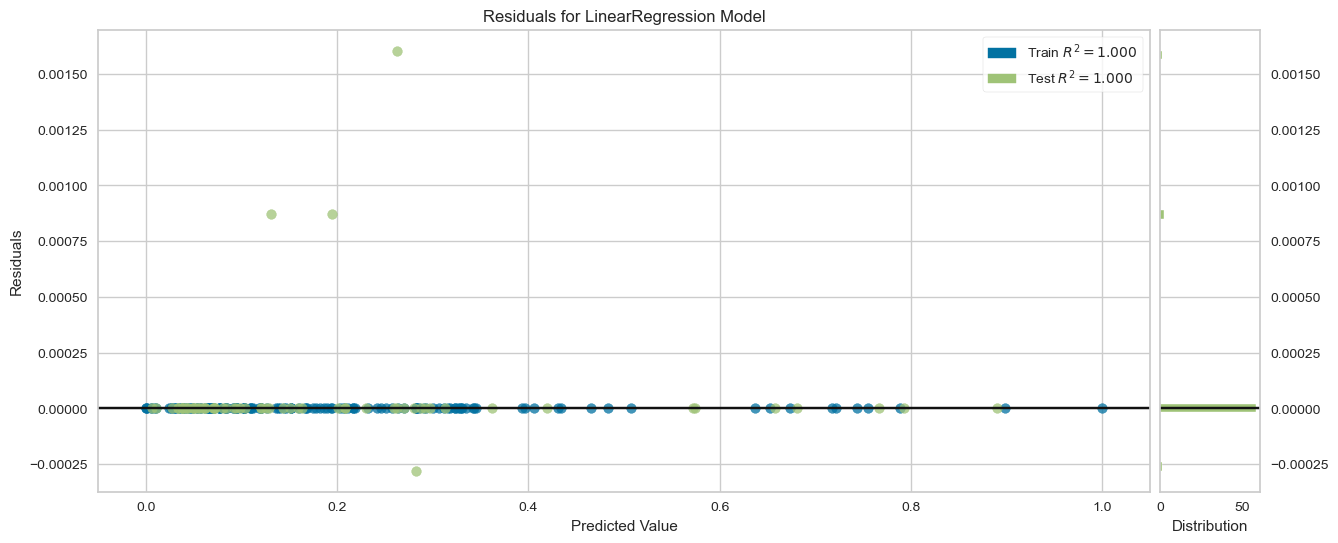

In [64]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6)) 
visualizer = ResidualsPlot(model,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof();    

### Recurseive Feature Elimination

In [65]:
from sklearn.feature_selection import RFE
lrm = LinearRegression()


# recursive feature elimination with cross validation, using r-squared as metric
rfe = RFE(estimator=lrm, step=3)
rfe.fit(X, np.hstack(Y.values))


feature_name = np.array(X.columns)
list(feature_name[rfe.support_])


# print the optimal number of feature
print("Optimal number of features : %d" % rfe.n_features_)

# save the selected features
feature_cols_selected = list((feature_name)[rfe.support_])
print("Features selected: " + str(feature_cols_selected))

Optimal number of features : 28
Features selected: ['fueltype', 'price', 'drivewheel_0', 'drivewheel_1', 'drivewheel_2', 'enginetype_0', 'enginetype_1', 'enginetype_2', 'enginetype_3', 'enginetype_4', 'enginetype_5', 'enginetype_6', 'fuelsystem_0', 'fuelsystem_1', 'fuelsystem_2', 'fuelsystem_3', 'fuelsystem_4', 'fuelsystem_5', 'fuelsystem_6', 'fuelsystem_7', 'car_company_1', 'car_company_6', 'car_company_11', 'car_company_12', 'car_company_13', 'car_company_14', 'car_company_17', 'car_company_19']


In [66]:
xtrain_new = xtrain[list(feature_name[rfe.support_])]
xtest_new = xtest[list(feature_name[rfe.support_])]
print(xtrain_new.shape)
print(xtest_new.shape)

(143, 28)
(62, 28)


In [67]:
print(ytrain.shape)
print(ytest.shape)

(143, 1)
(62, 1)


In [68]:
lm2 = LinearRegression()
lm2.fit(xtrain_new, ytrain)

LinearRegression()

In [69]:
pred_new=lm2.predict(xtest_new)

In [70]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(r2_score(ytest, pred_new)))

The R-squared value is: 1.0000 



### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
scores = cross_val_score(lm2, xtrain_new, ytrain, cv=10)

In [73]:
print(scores)

[1.         1.         1.         0.99999999 1.         0.99999963
 1.         1.         1.         0.99999952]


In [74]:
print(scores.mean())

0.9999999146331732


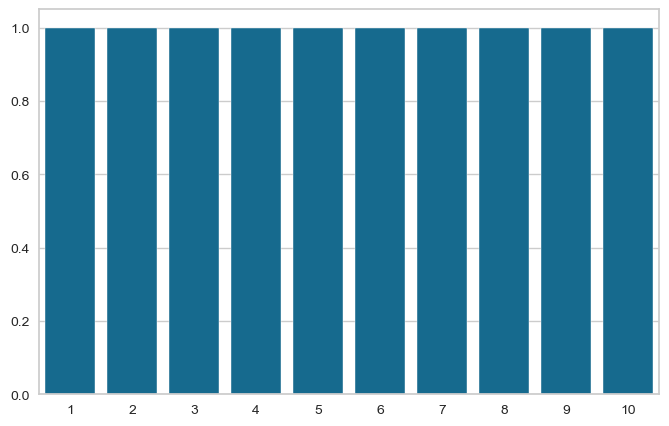

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()